In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam,Adagrad

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('data/crime_in_Seoul.csv',encoding='euc-kr')
df.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [280]:
df.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794


# 다른 사람


 - 전처리 과정
df = df.replace( ' , ' , ' ' )


 - dfCrime = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr',thousands = ',')


이걸 모르면 

```
a = df['절도 검거'].values
b = df['절도 발생'].values
aa = df['폭력 검거'].values
bb = df['폭력 발생'].values
a = [i.replace(',', '') for i in a]
b = [i.replace(',', '') for i in b]
a = np.array([int(i) for i in a])
b = np.array([int(i) for i in b])

aa = [i.replace(',', '') for i in aa]
bb = [i.replace(',', '') for i in bb]
aa = np.array([int(i) for i in aa])
bb = np.array([int(i) for i in bb])
df['절도 발생'] = b
df['절도 검거'] = a
df['폭력 발생'] = bb
df['폭력 검거'] = aa
df.info()
```
이렇게 멍청도식으로 짜야한다;


1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 
출력하시요



In [3]:
df[df['살인 발생'].values == [df['살인 발생'].max()]].iloc[:,:3]

,관서명,살인 발생,살인 검거
9,영등포서,14,12


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [6]:
a = df['절도 검거'].values
b = df['절도 발생'].values
aa = df['폭력 검거'].values
bb = df['폭력 발생'].values
a = [i.replace(',', '') for i in a]
b = [i.replace(',', '') for i in b]
a = np.array([int(i) for i in a])
b = np.array([int(i) for i in b])

aa = [i.replace(',', '') for i in aa]
bb = [i.replace(',', '') for i in bb]
aa = np.array([int(i) for i in aa])
bb = np.array([int(i) for i in bb])
df['절도 발생'] = b
df['절도 검거'] = a
df['폭력 발생'] = bb
df['폭력 검거'] = aa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int32 
 8   절도 검거   31 non-null     int32 
 9   폭력 발생   31 non-null     int32 
 10  폭력 검거   31 non-null     int32 
dtypes: int32(4), int64(6), object(1)
memory usage: 2.3+ KB


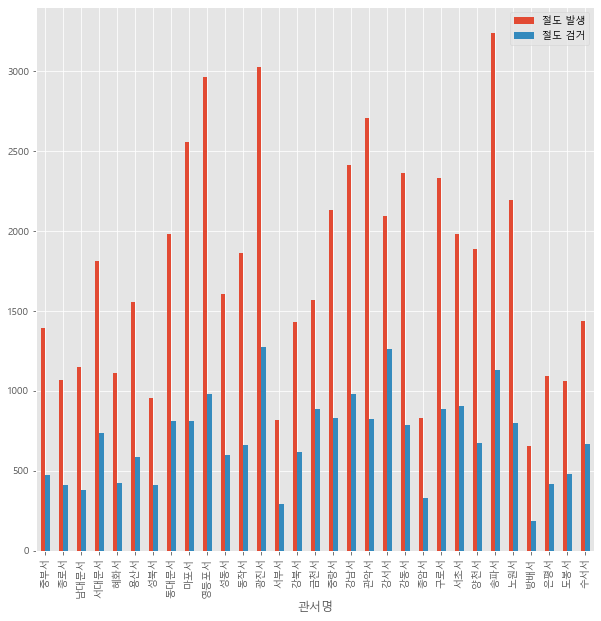

In [7]:

df[['관서명','절도 발생','절도 검거']].plot.bar(figsize=(10,10) ,x='관서명',y=['절도 발생','절도 검거'])
plt.show()

3. 절도검거율 컬럼을 추가 하시요

In [8]:
df['절도검거율'] = a/b

In [9]:
df.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,0.341935
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,0.385981
2,남대문서,1,0,6,4,65,46,1153,382,869,794,0.331310


4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)

In [10]:
df[['관서명','폭력 발생','폭력 검거']].sort_values(by=df[['관서명','폭력 발생','폭력 검거']].columns[2],ascending=False)[:5]

,관서명,폭력 발생,폭력 검거
9,영등포서,3572,2961
25,송파서,3295,2786
19,강서서,3207,2718
18,관악서,3298,2642
8,마포서,2983,2519


5. 상관관계 heatmap을 그리시요

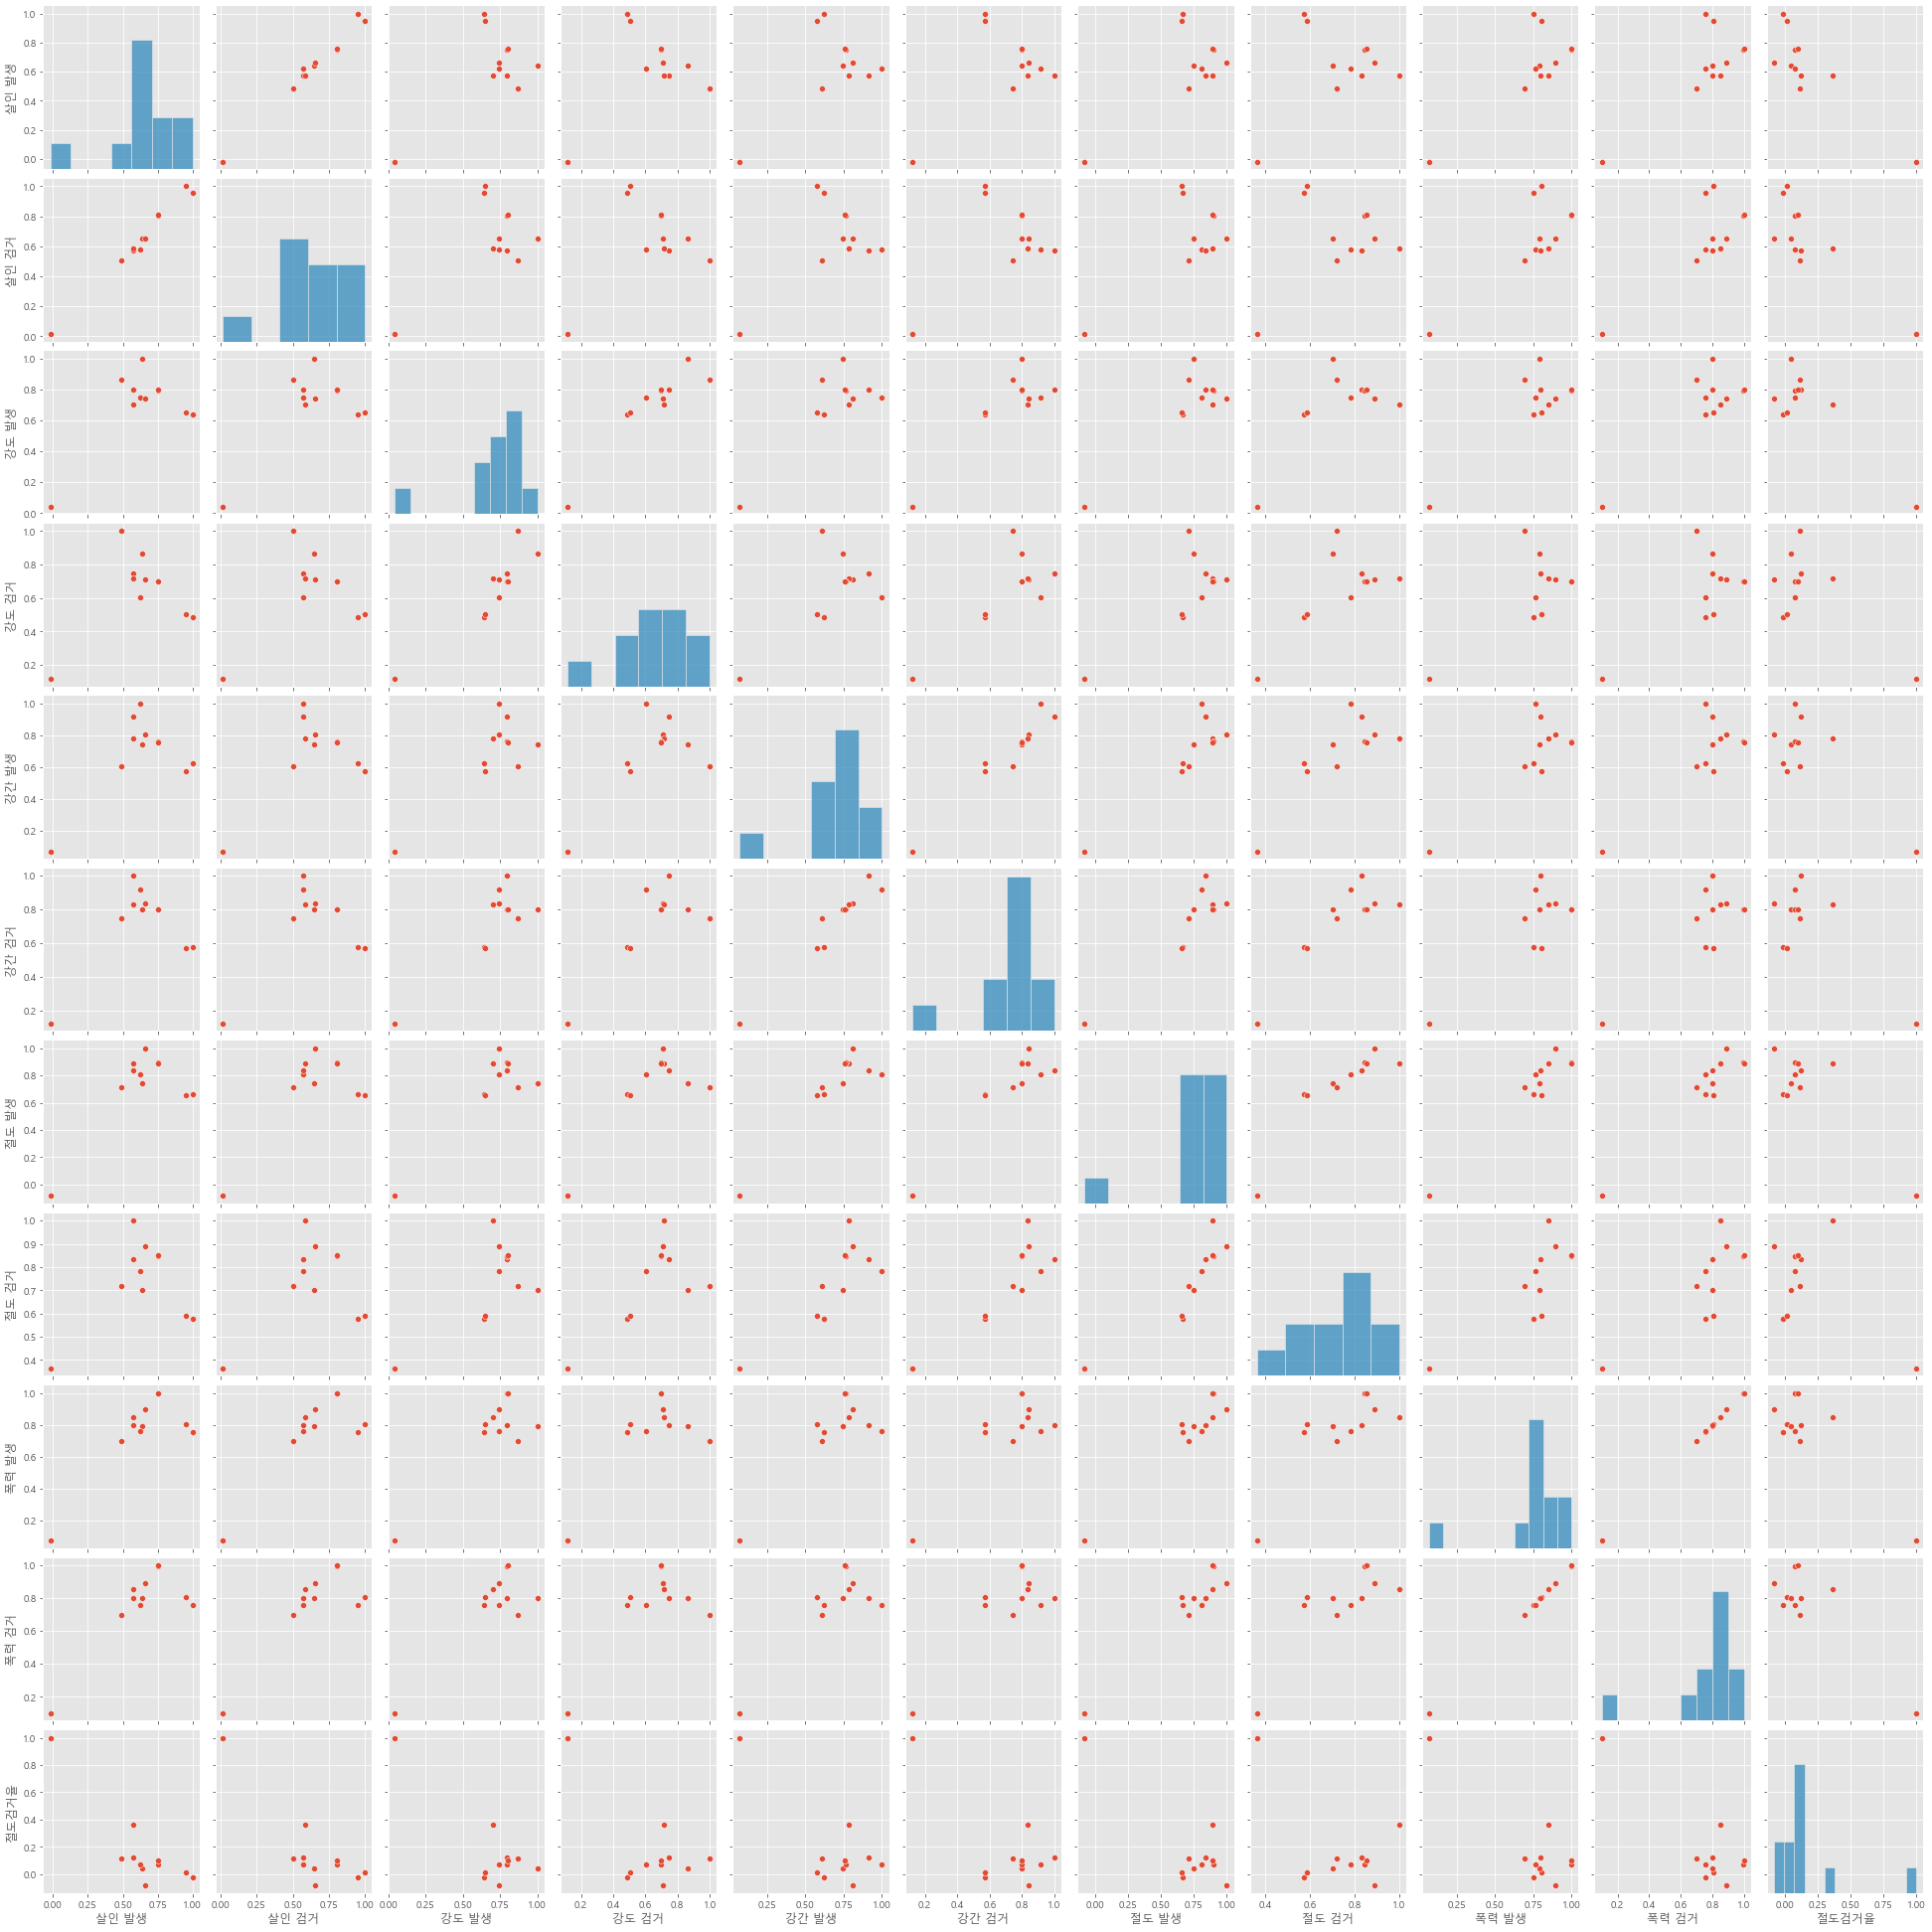

In [11]:
sns.pairplot(df.corr())

<AxesSubplot:>

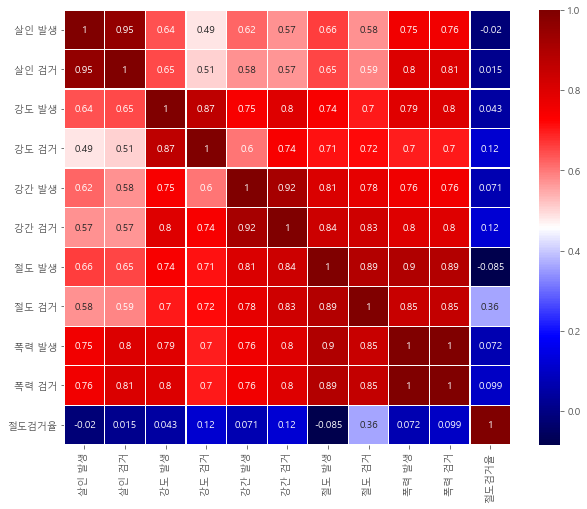

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap((df.corr()) ,annot=True,linewidths=0.2,cmap='seismic')

6. 살인발생과 폭력발생의 상관관계를 확인하고  
살인 발생이 5건인경우 폭력발생수를 예측하시요  
( 텐서버전, 케라스버전)

## 텐서 버전

In [290]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [291]:
# 상관 관계 확인
df[['살인 발생','폭력 발생']].corr()

,살인 발생,폭력 발생
살인 발생,1.000000,0.754575
폭력 발생,0.754575,1.000000


x = 살인발생과 폭력발생
y = 폭력발생수

In [292]:
x_data = df['살인 발생'].values
y_data = df['폭력 발생'].values

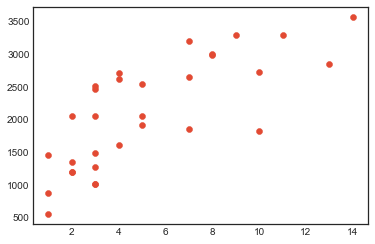

In [293]:
plt.scatter(x_data, y_data)
plt.show()

In [294]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)
w = tf.Variable( tf.random.uniform([1]) ) #임의의 값 부여
b = tf.Variable( tf.random.uniform([1]) )

In [295]:
def compute_cost():
    hx = w*x + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

In [296]:
optimizer = Adam(learning_rate = 1)
electric_cost = []
for i in range(2000):
    optimizer.minimize(compute_cost, var_list=[w, b]) 
    c = compute_cost().numpy()
    electric_cost.append(c)
    print(i, 'cost = ', c)

0 cost =  5040711.0
1 cost =  5010237.5
2 cost =  4979872.0
3 cost =  4949617.5
4 cost =  4919473.0
5 cost =  4889442.5
6 cost =  4859526.5
7 cost =  4829727.0
8 cost =  4800046.5
9 cost =  4770484.5
10 cost =  4741043.5
11 cost =  4711726.0
12 cost =  4682531.0
13 cost =  4653462.0
14 cost =  4624519.5
15 cost =  4595705.0
16 cost =  4567018.5
17 cost =  4538462.5
18 cost =  4510037.0
19 cost =  4481743.5
20 cost =  4453583.0
21 cost =  4425555.0
22 cost =  4397662.0
23 cost =  4369904.0
24 cost =  4342282.0
25 cost =  4314796.0
26 cost =  4287446.5
27 cost =  4260235.0
28 cost =  4233161.0
29 cost =  4206225.5
30 cost =  4179428.2
31 cost =  4152769.2
32 cost =  4126250.0
33 cost =  4099869.8
34 cost =  4073628.5
35 cost =  4047527.2
36 cost =  4021565.5
37 cost =  3995743.2
38 cost =  3970060.8
39 cost =  3944517.8
40 cost =  3919114.0
41 cost =  3893850.2
42 cost =  3868725.5
43 cost =  3843739.8
44 cost =  3818893.5
45 cost =  3794186.0
46 cost =  3769616.5
47 cost =  3745185.8
48

439 cost =  564075.1
440 cost =  563337.1
441 cost =  562607.3
442 cost =  561885.8
443 cost =  561172.25
444 cost =  560466.8
445 cost =  559769.25
446 cost =  559079.44
447 cost =  558397.25
448 cost =  557722.7
449 cost =  557055.6
450 cost =  556396.1
451 cost =  555743.9
452 cost =  555098.75
453 cost =  554461.06
454 cost =  553830.2
455 cost =  553206.3
456 cost =  552589.5
457 cost =  551979.3
458 cost =  551375.94
459 cost =  550779.2
460 cost =  550188.94
461 cost =  549605.25
462 cost =  549027.94
463 cost =  548456.94
464 cost =  547892.1
465 cost =  547333.5
466 cost =  546780.9
467 cost =  546234.4
468 cost =  545693.8
469 cost =  545159.1
470 cost =  544630.06
471 cost =  544106.8
472 cost =  543589.2
473 cost =  543077.1
474 cost =  542570.5
475 cost =  542069.4
476 cost =  541573.5
477 cost =  541082.9
478 cost =  540597.56
479 cost =  540117.4
480 cost =  539642.25
481 cost =  539172.1
482 cost =  538706.94
483 cost =  538246.75
484 cost =  537791.25
485 cost =  53734

878 cost =  464464.72
879 cost =  464325.34
880 cost =  464186.0
881 cost =  464046.66
882 cost =  463907.28
883 cost =  463767.97
884 cost =  463628.66
885 cost =  463489.28
886 cost =  463350.0
887 cost =  463210.62
888 cost =  463071.34
889 cost =  462932.0
890 cost =  462792.66
891 cost =  462653.38
892 cost =  462514.06
893 cost =  462374.72
894 cost =  462235.47
895 cost =  462096.16
896 cost =  461956.84
897 cost =  461817.53
898 cost =  461678.25
899 cost =  461539.0
900 cost =  461399.75
901 cost =  461260.44
902 cost =  461121.16
903 cost =  460981.94
904 cost =  460842.62
905 cost =  460703.4
906 cost =  460564.2
907 cost =  460424.97
908 cost =  460285.66
909 cost =  460146.44
910 cost =  460007.22
911 cost =  459868.0
912 cost =  459728.84
913 cost =  459589.6
914 cost =  459450.34
915 cost =  459311.16
916 cost =  459172.06
917 cost =  459032.8
918 cost =  458893.62
919 cost =  458754.53
920 cost =  458615.28
921 cost =  458476.16
922 cost =  458337.03
923 cost =  458197.

1306 cost =  406730.1
1307 cost =  406603.47
1308 cost =  406476.97
1309 cost =  406350.56
1310 cost =  406224.06
1311 cost =  406097.75
1312 cost =  405971.44
1313 cost =  405845.2
1314 cost =  405719.0
1315 cost =  405592.84
1316 cost =  405466.75
1317 cost =  405340.72
1318 cost =  405214.75
1319 cost =  405088.8
1320 cost =  404962.97
1321 cost =  404837.16
1322 cost =  404711.4
1323 cost =  404585.75
1324 cost =  404460.12
1325 cost =  404334.6
1326 cost =  404209.0
1327 cost =  404083.56
1328 cost =  403958.12
1329 cost =  403832.78
1330 cost =  403707.44
1331 cost =  403582.25
1332 cost =  403457.06
1333 cost =  403331.9
1334 cost =  403206.84
1335 cost =  403081.84
1336 cost =  402956.8
1337 cost =  402831.97
1338 cost =  402707.12
1339 cost =  402582.3
1340 cost =  402457.62
1341 cost =  402332.9
1342 cost =  402208.3
1343 cost =  402083.78
1344 cost =  401959.25
1345 cost =  401834.84
1346 cost =  401710.44
1347 cost =  401586.12
1348 cost =  401461.8
1349 cost =  401337.66
1

1674 cost =  364438.7
1675 cost =  364336.78
1676 cost =  364234.94
1677 cost =  364133.2
1678 cost =  364031.62
1679 cost =  363930.0
1680 cost =  363828.53
1681 cost =  363727.1
1682 cost =  363625.78
1683 cost =  363524.47
1684 cost =  363423.28
1685 cost =  363322.2
1686 cost =  363221.16
1687 cost =  363120.16
1688 cost =  363019.28
1689 cost =  362918.44
1690 cost =  362817.75
1691 cost =  362717.06
1692 cost =  362616.53
1693 cost =  362516.03
1694 cost =  362415.56
1695 cost =  362315.25
1696 cost =  362214.94
1697 cost =  362114.78
1698 cost =  362014.66
1699 cost =  361914.6
1700 cost =  361814.66
1701 cost =  361714.78
1702 cost =  361614.9
1703 cost =  361515.2
1704 cost =  361415.6
1705 cost =  361315.94
1706 cost =  361216.53
1707 cost =  361117.0
1708 cost =  361017.72
1709 cost =  360918.44
1710 cost =  360819.2
1711 cost =  360720.1
1712 cost =  360621.03
1713 cost =  360522.06
1714 cost =  360423.2
1715 cost =  360324.34
1716 cost =  360225.66
1717 cost =  360126.97
1

In [297]:
def hxFn(x_data):
    # xd = tf.constant( xdata)
    # hx = w*xd + b
    hx = w*x_data + b
    return hx.numpy()

In [298]:
# 살인 발생이 5건인경우 폭력발생수를 예측
hxFn([5])

array([1931.3638], dtype=float32)

## 케라스 버전

In [299]:
dense = Dense(units=1, input_dim=1)
model = Sequential([dense])
model.compile(loss='mse', optimizer = Adam(learning_rate=1))
h = model.fit(x_data, y_data, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 151ms/step - loss: 5053828.0000
Epoch 2/1000
1/1 [==============================] - 0s 995us/step - loss: 5023310.5000
Epoch 3/1000
1/1 [==============================] - 0s 997us/step - loss: 4992899.5000
Epoch 4/1000
1/1 [==============================] - 0s 996us/step - loss: 4962596.5000
Epoch 5/1000
1/1 [==============================] - 0s 984us/step - loss: 4932403.5000
Epoch 6/1000
1/1 [==============================] - 0s 998us/step - loss: 4902321.5000
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 4872353.0000
Epoch 8/1000
1/1 [==============================] - 0s 997us/step - loss: 4842499.0000
Epoch 9/1000
1/1 [==============================] - 0s 997us/step - loss: 4812761.5000
Epoch 10/1000
1/1 [==============================] - 0s 997us/step - loss: 4783142.0000
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 4753643.5000
Epoch 12/1000
1/1 [==========================

1/1 [==============================] - 0s 997us/step - loss: 1501445.1250
Epoch 188/1000
1/1 [==============================] - 0s 996us/step - loss: 1491991.2500
Epoch 189/1000
1/1 [==============================] - 0s 998us/step - loss: 1482612.6250
Epoch 190/1000
1/1 [==============================] - 0s 998us/step - loss: 1473308.6250
Epoch 191/1000
1/1 [==============================] - 0s 2ms/step - loss: 1464079.0000
Epoch 192/1000
1/1 [==============================] - 0s 2ms/step - loss: 1454923.2500
Epoch 193/1000
1/1 [==============================] - 0s 998us/step - loss: 1445840.8750
Epoch 194/1000
1/1 [==============================] - 0s 997us/step - loss: 1436831.3750
Epoch 195/1000
1/1 [==============================] - 0s 997us/step - loss: 1427894.5000
Epoch 196/1000
1/1 [==============================] - 0s 997us/step - loss: 1419029.3750
Epoch 197/1000
1/1 [==============================] - 0s 997us/step - loss: 1410236.2500
Epoch 198/1000
1/1 [====================

1/1 [==============================] - 0s 997us/step - loss: 639262.3750
Epoch 374/1000
1/1 [==============================] - 0s 2ms/step - loss: 637688.1250
Epoch 375/1000
1/1 [==============================] - 0s 997us/step - loss: 636131.3125
Epoch 376/1000
1/1 [==============================] - 0s 2ms/step - loss: 634591.7500
Epoch 377/1000
1/1 [==============================] - 0s 2ms/step - loss: 633069.2500
Epoch 378/1000
1/1 [==============================] - 0s 998us/step - loss: 631563.5625
Epoch 379/1000
1/1 [==============================] - 0s 997us/step - loss: 630074.5625
Epoch 380/1000
1/1 [==============================] - 0s 998us/step - loss: 628602.3125
Epoch 381/1000
1/1 [==============================] - 0s 997us/step - loss: 627146.1875
Epoch 382/1000
1/1 [==============================] - 0s 996us/step - loss: 625706.4375
Epoch 383/1000
1/1 [==============================] - 0s 997us/step - loss: 624282.6875
Epoch 384/1000
1/1 [==============================] -

1/1 [==============================] - 0s 998us/step - loss: 514541.6250
Epoch 560/1000
1/1 [==============================] - 0s 998us/step - loss: 514309.2188
Epoch 561/1000
1/1 [==============================] - 0s 2ms/step - loss: 514078.2500
Epoch 562/1000
1/1 [==============================] - 0s 2ms/step - loss: 513849.0000
Epoch 563/1000
1/1 [==============================] - 0s 996us/step - loss: 513621.2188
Epoch 564/1000
1/1 [==============================] - 0s 998us/step - loss: 513395.1250
Epoch 565/1000
1/1 [==============================] - 0s 996us/step - loss: 513170.4062
Epoch 566/1000
1/1 [==============================] - 0s 998us/step - loss: 512947.2812
Epoch 567/1000
1/1 [==============================] - 0s 997us/step - loss: 512725.5312
Epoch 568/1000
1/1 [==============================] - 0s 2ms/step - loss: 512505.2812
Epoch 569/1000
1/1 [==============================] - 0s 2ms/step - loss: 512286.4375
Epoch 570/1000
1/1 [==============================] - 0

Epoch 746/1000
1/1 [==============================] - 0s 996us/step - loss: 483694.0938
Epoch 747/1000
1/1 [==============================] - 0s 997us/step - loss: 483552.9062
Epoch 748/1000
1/1 [==============================] - 0s 996us/step - loss: 483411.7188
Epoch 749/1000
1/1 [==============================] - 0s 997us/step - loss: 483270.6250
Epoch 750/1000
1/1 [==============================] - 0s 997us/step - loss: 483129.5312
Epoch 751/1000
1/1 [==============================] - 0s 2ms/step - loss: 482988.4688
Epoch 752/1000
1/1 [==============================] - 0s 2ms/step - loss: 482847.4375
Epoch 753/1000
1/1 [==============================] - 0s 997us/step - loss: 482706.4375
Epoch 754/1000
1/1 [==============================] - 0s 2ms/step - loss: 482565.5625
Epoch 755/1000
1/1 [==============================] - 0s 2ms/step - loss: 482424.5625
Epoch 756/1000
1/1 [==============================] - 0s 997us/step - loss: 482283.7188
Epoch 757/1000
1/1 [====================

1/1 [==============================] - 0s 998us/step - loss: 457625.1250
Epoch 933/1000
1/1 [==============================] - 0s 998us/step - loss: 457485.3750
Epoch 934/1000
1/1 [==============================] - 0s 997us/step - loss: 457345.6875
Epoch 935/1000
1/1 [==============================] - 0s 2ms/step - loss: 457206.0000
Epoch 936/1000
1/1 [==============================] - 0s 997us/step - loss: 457066.3438
Epoch 937/1000
1/1 [==============================] - 0s 2ms/step - loss: 456926.6562
Epoch 938/1000
1/1 [==============================] - 0s 997us/step - loss: 456787.0000
Epoch 939/1000
1/1 [==============================] - 0s 997us/step - loss: 456647.3438
Epoch 940/1000
1/1 [==============================] - 0s 997us/step - loss: 456507.7500
Epoch 941/1000
1/1 [==============================] - 0s 2ms/step - loss: 456368.0938
Epoch 942/1000
1/1 [==============================] - 0s 2ms/step - loss: 456228.4375
Epoch 943/1000
1/1 [==============================] - 0

In [300]:
w, b = dense.get_weights()

In [301]:
model.predict([5])

array([[1828.3743]], dtype=float32)